## Extra code (Random Attack)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def get_graph_stats(graph):
    return {
        "Nodes": graph.number_of_nodes(),
        "Edges": graph.number_of_edges(),
    }

ingredient_graph_path = 'ingredients_weighted_graph.gml'

ingredient_graph = nx.read_gml(ingredient_graph_path)

ingredient_stats = get_graph_stats(ingredient_graph)

results = {
    "Stats": {
        "Ingredient Graph": ingredient_stats,
    }
}

results


{'Stats': {'Ingredient Graph': {'Nodes': 214, 'Edges': 2672}}}

In [2]:
import random
def random_attack(graph, removal_fraction=0.1):
    num_nodes_to_remove = int(removal_fraction * graph.number_of_nodes())
    nodes_to_remove = random.sample(list(graph.nodes()), num_nodes_to_remove)  # Convert nodes to list for sampling
    attacked_graph = graph.copy()
    attacked_graph.remove_nodes_from(nodes_to_remove)
    return attacked_graph

random_attacked_ingredient_graph = random_attack(ingredient_graph, removal_fraction=0.1)


In [3]:
def targeted_attack(graph, centrality_type="degree", top_n=5):
    """
    Perform a targeted attack by removing the top N nodes based on a centrality measure.
    
    Parameters:
        graph (networkx.Graph): The input graph.
        centrality_type (str): The type of centrality to use ('degree' or 'betweenness').
        top_n (int): The number of top nodes to remove.
        
    Returns:
        networkx.Graph: The graph after the targeted attack.
        list: The nodes that were removed.
    """
    if centrality_type == "degree":
        centrality = nx.degree_centrality(graph)
    elif centrality_type == "betweenness":
        centrality = nx.betweenness_centrality(graph)
    else:
        raise ValueError("Invalid centrality_type. Choose 'degree' or 'betweenness'.")
    
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    nodes_to_remove = [node for node, _ in top_nodes]
    
    attacked_graph = graph.copy()
    attacked_graph.remove_nodes_from(nodes_to_remove)
    
    return attacked_graph, nodes_to_remove

targeted_attacked_ingredient_graph_degree, removed_ingredient_nodes_degree = targeted_attack(
    ingredient_graph, centrality_type="degree", top_n=5
)

targeted_attacked_ingredient_graph_betweenness, removed_ingredient_nodes_betweenness = targeted_attack(
    ingredient_graph, centrality_type="betweenness", top_n=5
)


In [4]:
ingredient_random_stats = get_graph_stats(random_attacked_ingredient_graph)

ingredient_targeted_degree_stats = get_graph_stats(targeted_attacked_ingredient_graph_degree)

ingredient_targeted_betweenness_stats = get_graph_stats(targeted_attacked_ingredient_graph_betweenness)

results = {
    "Random Attack": {
        "Ingredient Graph": ingredient_random_stats,
    },
    "Targeted Attack (Degree Centrality)": {
        "Ingredient Graph": ingredient_targeted_degree_stats,
    },
    "Targeted Attack (Betweenness Centrality)": {
        "Ingredient Graph": ingredient_targeted_betweenness_stats,
    }
}

results


{'Random Attack': {'Ingredient Graph': {'Nodes': 193, 'Edges': 2071}},
 'Targeted Attack (Degree Centrality)': {'Ingredient Graph': {'Nodes': 209,
   'Edges': 2070}},
 'Targeted Attack (Betweenness Centrality)': {'Ingredient Graph': {'Nodes': 209,
   'Edges': 2082}}}

Top Ingredients by Degree Centrality (Random Attack: Ingredient Graph):
   Ingredient  Degree Centrality
11      onion           0.619792
23     pepper           0.567708
32     garlic           0.510417
26      sugar           0.484375
27        oil           0.479167
14      water           0.453125
4      butter           0.432292
12   tomatoes           0.359375
98     carrot           0.338542
49      flour           0.338542


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_75926/2211637347.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


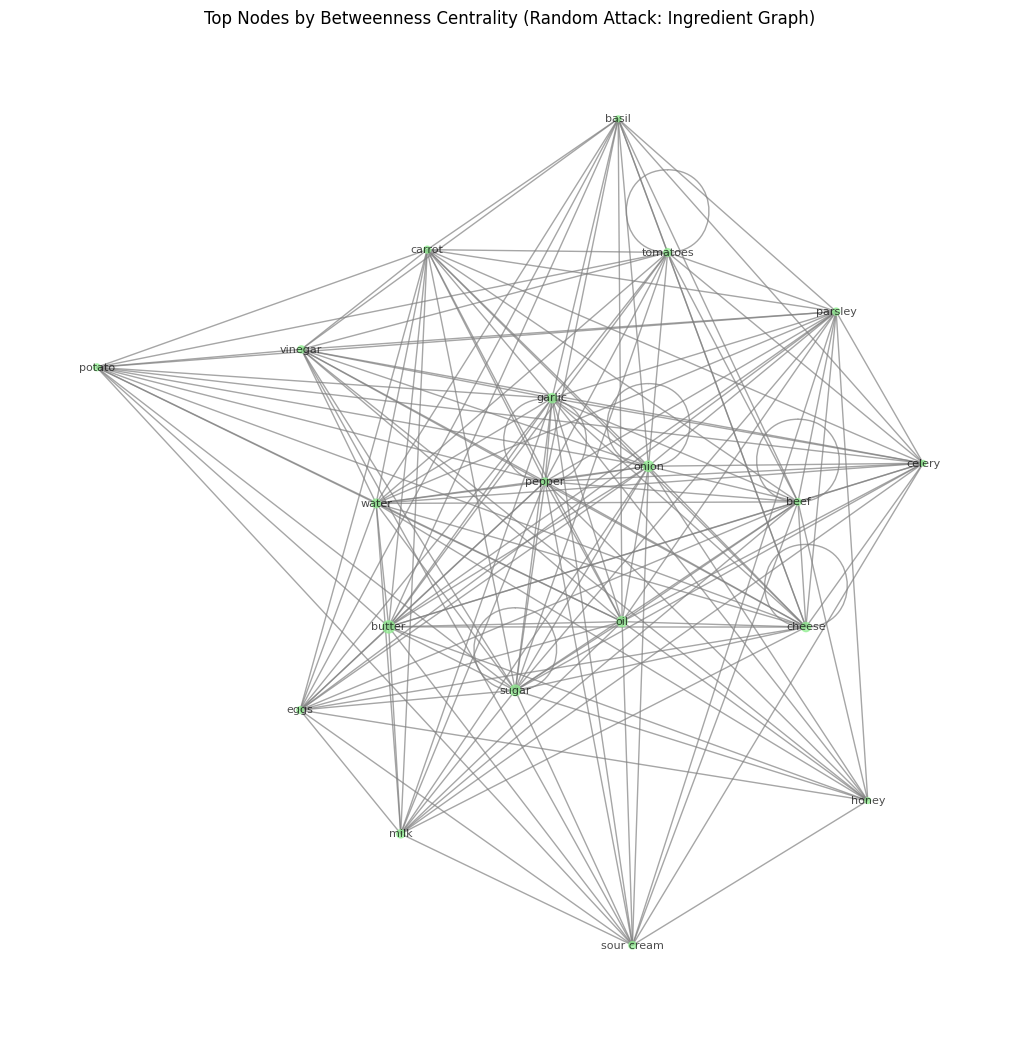

Top Ingredients by Degree Centrality (Targeted Attack (Degree): Ingredient Graph):
    Ingredient  Degree Centrality
27         oil           0.461538
15       water           0.447115
4       butter           0.437500
12    tomatoes           0.350962
10      cheese           0.322115
51       flour           0.322115
105     carrot           0.322115
8         eggs           0.317308
5    olive oil           0.307692
11        beef           0.302885


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_75926/2211637347.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


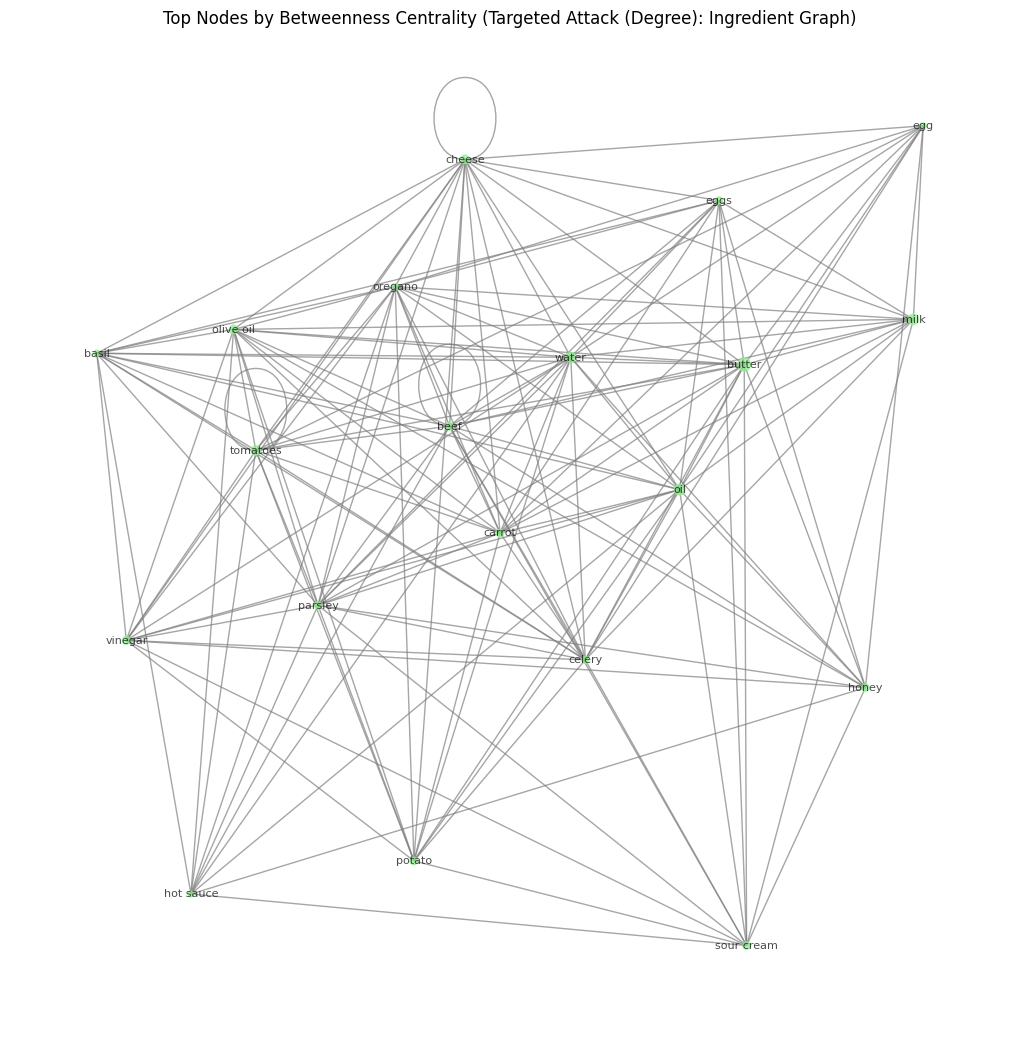

Top Ingredients by Degree Centrality (Targeted Attack (Betweenness): Ingredient Graph):
    Ingredient  Degree Centrality
34      garlic           0.495192
26         oil           0.461538
14       water           0.447115
11    tomatoes           0.350962
9       cheese           0.322115
51       flour           0.322115
105     carrot           0.322115
7         eggs           0.317308
4    olive oil           0.307692
10        beef           0.302885


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_75926/2211637347.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


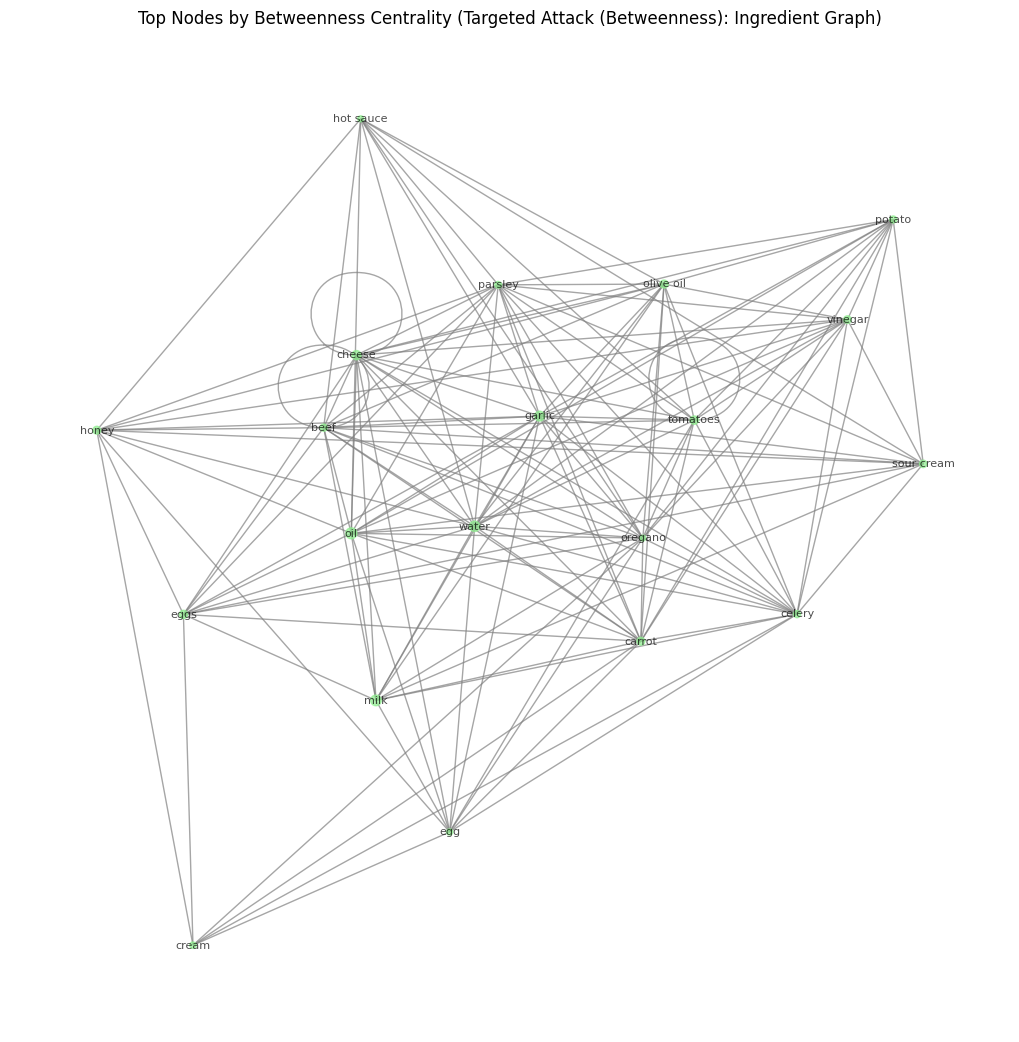

In [5]:
def analyze_and_plot_centralities(graph, graph_title, top_n=10, betweenness_top_n=20):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph, weight='weight')
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, weight='weight', max_iter=1000)

    centrality_df = pd.DataFrame({
        'Ingredient': list(degree_centrality.keys()),
        'Degree Centrality': list(degree_centrality.values()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
    })

    top_centrality = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(top_n)
    print(f"Top Ingredients by Degree Centrality ({graph_title}):")
    print(top_centrality[['Ingredient', 'Degree Centrality']])

    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:betweenness_top_n]
    top_nodes = [node for node, _ in top_betweenness]
    top_graph = graph.subgraph(top_nodes)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(top_graph, k=0.5, iterations=50)
    node_size = [betweenness_centrality[node] * 1000 for node in top_graph.nodes()]
    nx.draw(
        top_graph, pos, with_labels=True, node_color='lightgreen', node_size=node_size,
        font_size=8, edge_color='gray', alpha=0.7
    )
    plt.title(f"Top Nodes by Betweenness Centrality ({graph_title})")
    plt.tight_layout()
    plt.show()


analyze_and_plot_centralities(random_attacked_ingredient_graph, "Random Attack: Ingredient Graph")

analyze_and_plot_centralities(targeted_attacked_ingredient_graph_degree, "Targeted Attack (Degree): Ingredient Graph")

analyze_and_plot_centralities(targeted_attacked_ingredient_graph_betweenness, "Targeted Attack (Betweenness): Ingredient Graph")